Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos
<br>

<center>
    <h2> Tarea 1 </h2>
    <h1> Mobile Price </h1>
    <p>
        Profesor Marcelo Mendoza<br>
        Segundo Semestre 2023<br>    
        Fecha de entrega: 4 de septiembre
    </p>
    <br>
</center>

<br>

---

## Indicaciones

Deberás entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas. Es decir, si tienes un código perfecto pero este no es explicado o no se responden preguntas asociadas a este, no se tendrá el puntaje completo.
- El notebook debe tener todas las celdas de código ejecutadas. Cualquier notebook que no las tenga no podrá ser corregido.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.

---

## Librerías

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importa aquí las librerías que vayas a utilizar




##Introducción

El dataset utilizado es Mobile Price. Este conjunto de datos refleja una serie de características propias de un teléfono móvil.

A continuación, se presentan las variables que están contenidas:

* battery_power: Capacidad de la batería.

* blue: Tiene bluetooth o no.

* clock_speed: Frecuencia del procesador.

* dual_sim: Tiene dual sim o no.

* fc: Megapixeles de la cámara frontal.

* four_g: Tiene 4G o no.

* int_memory: Memoria interna.

* m_dep: Profundidad del teléfono.

* mobile_wt: Peso del teléfono.

* n_cores: Número de procesadores.

* pc: Megapixeles de la cámara trasera.

* px_height: Cantidad de pixeles (alto)

* px_width: Cantidad de pixeles (ancho)

* ram: Memoria RAM

* sc_h: Altura de la pantalla.

* sc_w: Ancho de la pantalla.

* talk_time: Duración de la batería.

* three_g: Tiene 3G o no.

* touch_screen: Tiene pantalla táctil o no.

* wifi: Tiene WIFI o no.

* price_range: Rango de precios (0: low cost, 1: medium cost, 2: high cost y 3: very high cost)




## Parte 1: Carga y Preprocesamiento de Datos (20 puntos)

En esta primera parte se debe cargar el dataset y luego describir el comportamiento de algunas variables de interés. Posteriormente, debe realizar el proceso de normalización de los datos.

### 1.1 Carga de Datos (3 puntos)

Cargue el dataset Mobile Price dataset. Indique la cantidad de filas y columnas del conjunto de datos. ¿Existen datos nulos?

RESPUESTA:

In [3]:
import pandas as pd

# Cargar el conjunto de datos desde el archivo CSV
file_path = "Mobile Price dataset.csv"
data = pd.read_csv(file_path)

# Obtener la cantidad de filas y columnas
num_rows, num_cols = data.shape

# Verificar si existen datos nulos
hay_nulos = data.isnull().any().any()

print("Cantidad de filas:", num_rows)
print("Cantidad de columnas:", num_cols)
print("¿Existen datos nulos?", hay_nulos)



Cantidad de filas: 2000
Cantidad de columnas: 21
¿Existen datos nulos? False


### 1.2 Describir dataset (9 puntos)

Mediante gráficos y medidas descriptivas apropiadas, describa el comportamiento de las variables:

* battery_power
* ram
* fc
* price_range

Luego, use gráficos y medidas descriptivas para reflejar la relación existente entre cada variable cuantitativa y el nivel de precios (price_range). Comente.

RESPUESTA:

       battery_power          ram           fc  price_range
count    2000.000000  2000.000000  2000.000000  2000.000000
mean     1238.518500  2124.213000     4.309500     1.500000
std       439.418206  1084.732044     4.341444     1.118314
min       501.000000   256.000000     0.000000     0.000000
25%       851.750000  1207.500000     1.000000     0.750000
50%      1226.000000  2146.500000     3.000000     1.500000
75%      1615.250000  3064.500000     7.000000     2.250000
max      1998.000000  3998.000000    19.000000     3.000000


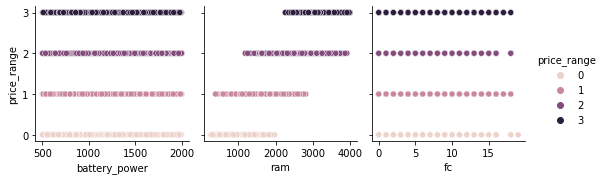

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos
file_path = "Mobile Price dataset.csv"
data = pd.read_csv(file_path)

# Describir las variables
description = data[['battery_power', 'ram', 'fc', 'price_range']].describe()
print(description)

# Visualizar la relación entre variables cuantitativas y nivel de precios
sns.pairplot(data=data, x_vars=['battery_power', 'ram', 'fc'], y_vars=['price_range'], hue='price_range', diag_kind='kde')
plt.show()



battery_power: La capacidad de la batería varía de 501 a 1998, con un promedio de 1238.52 y una dispersión significativa. Hay una relación positiva entre battery_power y price_range.

ram: La memoria RAM oscila entre 256 y 3998, con un promedio de 2124.21 y dispersión considerable. Hay una relación positiva entre ram y price_range.

fc: Los megapíxeles de la cámara frontal van de 0 a 19, con un promedio de 4.31 y dispersión moderada. No se observa una relación clara con price_range.

price_range: Los niveles de precios varían de 0 a 3, con un promedio de 1.5 y distribución equitativa. Las variables battery_power y ram parecen influir en este atributo.

En los gráficos, se ve que battery_power y ram tienden a aumentar junto con el nivel de precios, mientras que fc no muestra una tendencia clara respecto a los precios.

### 1.3 Normalizar datos (8 puntos)

Realice un proceso de normalización, considerando **SOLO** las siguientes variables:

* 'battery_power',
* 'clock_speed',
* 'fc',
* 'int_memory',
* 'm_dep',
* 'mobile_wt',
* 'n_cores',
* 'pc',
* 'px_height',
* 'px_width',
* 'ram',
* 'sc_h',
* 'sc_w',
* 'talk_time'


Explique por qué es útil realizar esta acción.

RESPUESTA:

In [5]:
import pandas as pd

# Cargar el conjunto de datos
file_path = "Mobile Price dataset.csv"
data = pd.read_csv(file_path)

# Variables a normalizar
variables_to_normalize = [
    'battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
    'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram',
    'sc_h', 'sc_w', 'talk_time'
]

# Aplicar normalización Min-Max
data[variables_to_normalize] = (data[variables_to_normalize] - data[variables_to_normalize].min()) / (data[variables_to_normalize].max() - data[variables_to_normalize].min())

# Imprimir las primeras filas del conjunto de datos normalizado
print(data.head())



   battery_power  blue  clock_speed  dual_sim        fc  four_g  int_memory  \
0       0.227789     0         0.68         0  0.052632       0    0.080645   
1       0.347361     1         0.00         1  0.000000       1    0.822581   
2       0.041416     1         0.00         1  0.105263       1    0.629032   
3       0.076152     1         0.80         0  0.000000       0    0.129032   
4       0.881764     1         0.28         0  0.684211       1    0.677419   

      m_dep  mobile_wt   n_cores  ...  px_height  px_width       ram  \
0  0.555556   0.900000  0.142857  ...   0.010204  0.170895  0.612774   
1  0.666667   0.466667  0.285714  ...   0.461735  0.993324  0.634687   
2  0.888889   0.541667  0.571429  ...   0.644388  0.811749  0.627205   
3  0.777778   0.425000  0.714286  ...   0.620408  0.858478  0.671566   
4  0.555556   0.508333  0.142857  ...   0.616327  0.475300  0.308658   

       sc_h      sc_w  talk_time  three_g  touch_screen  wifi  price_range  
0  0.285714  0.


La normalización es útil porque:

1)Equilibra las diferentes escalas de las variables, evitando que unas dominen otras.
2)Elimina la influencia de las unidades y previene problemas numéricos.
3)Mejora la convergencia de algoritmos y permite comparar coeficientes directamente en modelos.
4)Facilita la interpretación de resultados y visualizaciones al tener datos en una escala común.

### Bonus: Investigar medida de asociación lineal (3 décimas)

Investigue una medida de asociación lineal entre variables cuantitativas. Describa sus principales características, poniendo énfasis en la interpretación de sus resultados. Luego, calcule la medida respectiva para los datos cuantitativos ya normalizados en el punto 1.3. ¿Qué variables tienen la mayor relación?

RESPUESTA:


Una medida de asociación lineal común entre variables cuantitativas es el coeficiente de correlación de Pearson. Este coeficiente mide la fuerza y la dirección de la relación lineal entre dos variables. Sus características principales son:

Rango de Valores: El coeficiente de correlación de Pearson varía entre -1 y 1. Un valor de -1 indica una correlación negativa perfecta, 0 indica ausencia de correlación y 1 indica una correlación positiva perfecta.

Interpretación: Un valor cercano a -1 o 1 sugiere una relación lineal fuerte entre las variables, mientras que un valor cercano a 0 indica una relación débil o nula. La dirección (positiva o negativa) muestra si las variables tienden a aumentar o disminuir juntas.

Limitaciones: El coeficiente de correlación de Pearson solo captura relaciones lineales. No captura relaciones no lineales, independientemente de cuán fuertes sean.

Para calcular el coeficiente de correlación de Pearson entre las variables normalizadas en el subconjunto que mencionaste, puedes utilizar la función corr de pandas:

In [6]:
correlation_matrix = data[variables_to_normalize].corr()
print(correlation_matrix)


               battery_power  clock_speed        fc  int_memory     m_dep  \
battery_power       1.000000     0.011482  0.033334   -0.004004  0.034085   
clock_speed         0.011482     1.000000 -0.000434    0.006545 -0.014364   
fc                  0.033334    -0.000434  1.000000   -0.029133 -0.001791   
int_memory         -0.004004     0.006545 -0.029133    1.000000  0.006886   
m_dep               0.034085    -0.014364 -0.001791    0.006886  1.000000   
mobile_wt           0.001844     0.012350  0.023618   -0.034214  0.021756   
n_cores            -0.029727    -0.005724 -0.013356   -0.028310 -0.003504   
pc                  0.031441    -0.005245  0.644595   -0.033273  0.026282   
px_height           0.014901    -0.014523 -0.009990    0.010441  0.025263   
px_width           -0.008402    -0.009476 -0.005176   -0.008335  0.023566   
ram                -0.000653     0.003443  0.015099    0.032813 -0.009434   
sc_h               -0.029959    -0.029078 -0.011014    0.037771 -0.025348   

En la matriz de correlación, los valores más cercanos a -1 o 1 indican una mayor relación lineal. Puedes identificar qué pares de variables tienen la mayor relación basándote en los valores absolutos de la matriz de correlación. px_height' y 'px_width': Tienen una correlación positiva muy alta de 0.95. Esto indica una fuerte relación entre la altura y el ancho de la pantalla.





## Parte 2: Reducción de dimensionalidad (15 puntos)

En esta segunda sección se debe utilizar el resultado 1.3 de la parte 1. Para reducir la dimensionalidad, se debe trabajar con **Principal Component Analysis (PCA)**.

### 2.1 Comportamiento de la varianza (5 puntos)

Grafique el comportamiento de la varianza en función del número de componentes. Comente.

RESPUESTA:

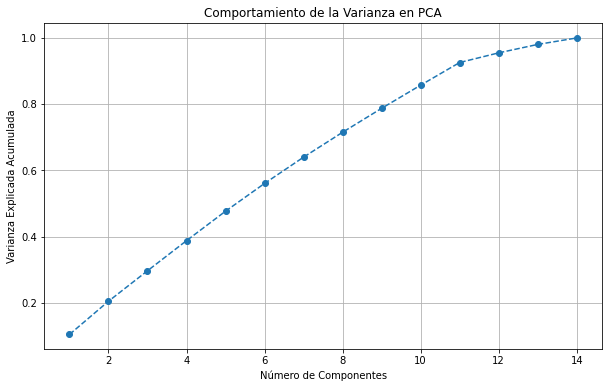

Número de Componentes: 1, Varianza Explicada Acumulada: 0.1048
Número de Componentes: 2, Varianza Explicada Acumulada: 0.2050
Número de Componentes: 3, Varianza Explicada Acumulada: 0.2971
Número de Componentes: 4, Varianza Explicada Acumulada: 0.3880
Número de Componentes: 5, Varianza Explicada Acumulada: 0.4770
Número de Componentes: 6, Varianza Explicada Acumulada: 0.5607
Número de Componentes: 7, Varianza Explicada Acumulada: 0.6401
Número de Componentes: 8, Varianza Explicada Acumulada: 0.7153
Número de Componentes: 9, Varianza Explicada Acumulada: 0.7875
Número de Componentes: 10, Varianza Explicada Acumulada: 0.8574
Número de Componentes: 11, Varianza Explicada Acumulada: 0.9259
Número de Componentes: 12, Varianza Explicada Acumulada: 0.9550
Número de Componentes: 13, Varianza Explicada Acumulada: 0.9805
Número de Componentes: 14, Varianza Explicada Acumulada: 1.0000


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Cargar los datos normalizados
data_normalized = ...  # Tus datos normalizados aquí

# Realizar PCA
pca = PCA()
pca.fit(data[variables_to_normalize])

# Obtener la varianza explicada acumulada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Graficar el comportamiento de la varianza en función del número de componentes
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Comportamiento de la Varianza en PCA')
plt.grid()
plt.show()

for i, ratio in enumerate(cumulative_variance_ratio, start=1):
    print(f'Número de Componentes: {i}, Varianza Explicada Acumulada: {ratio:.4f}')

A medida que se aumenta el número de componentes, la varianza explicada acumulada aumenta. En este caso, hay decidir cuánta varianza se esta dispuesto a sacrificar para reducir la dimensionalidad los datos. Por ejemplo, si se desea conservar al menos el 90% de la varianza original, se podría seleccionar alrededor de 11 componentes principales.

### 2.2 Retener 90% de la varianza (5 puntos)

PCA debe retener un 90% de la varianza de los datos originales. ¿Cuál es el número de componentes que se requieren?

RESPUESTA:

Como se dijo en la pregunta anterior alrededor de 11
Número de Componentes: 1, Varianza Explicada Acumulada: 0.1048
Número de Componentes: 2, Varianza Explicada Acumulada: 0.2050
Número de Componentes: 3, Varianza Explicada Acumulada: 0.2971
...
Número de Componentes: 11, Varianza Explicada Acumulada: 0.9259


### 2.3 Reducir dimensionalidad a n=6 (5 puntos)

PCA debe construirse con dimensionalidad n=6. Determine la proporción de varianza explicada.

RESPUESTA:

In [8]:
import numpy as np
from sklearn.decomposition import PCA

# Cargar los datos normalizados
data_normalized = data[variables_to_normalize]

# Realizar PCA con 6 componentes
n_components = 6
pca = PCA(n_components=n_components)
pca.fit(data_normalized)

# Obtener la proporción de varianza explicada acumulada con 6 componentes
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print(f'Proporción de Varianza Explicada Acumulada con {n_components} componentes: {cumulative_variance_ratio[-1]:.4f}')


Proporción de Varianza Explicada Acumulada con 6 componentes: 0.5607


## Parte 3: Detección de outliers (10 puntos)

En esta tercera parte se debe evaluar la existencia de outliers en el conjunto de datos que solo contiene variables cuantitativas. Para ello, debe trabajar con la matriz obtenida en el punto 2.2 (retiene el 90% de la varianza).

### 3.1 Graficar histograma LOF (5 puntos)

Utilizando la técnica **Local Outlier Factor (LOF)**, construya un histograma de puntajes LOF. Considere un número de vecinos igual a 5 y use como métrica la distancia euclidiana.

RESPUESTA:

      battery_power  clock_speed        fc  int_memory     m_dep  mobile_wt  \
0          0.227789         0.68  0.052632    0.080645  0.555556   0.900000   
1          0.347361         0.00  0.000000    0.822581  0.666667   0.466667   
2          0.041416         0.00  0.105263    0.629032  0.888889   0.541667   
3          0.076152         0.80  0.000000    0.129032  0.777778   0.425000   
4          0.881764         0.28  0.684211    0.677419  0.555556   0.508333   
...             ...          ...       ...         ...       ...        ...   
1995       0.195725         0.00  0.000000    0.000000  0.777778   0.216667   
1996       0.977956         0.84  0.000000    0.596774  0.111111   0.891667   
1997       0.941884         0.16  0.052632    0.548387  0.666667   0.233333   
1998       0.675351         0.16  0.210526    0.709677  0.000000   0.541667   
1999       0.006012         0.60  0.263158    0.693548  0.888889   0.733333   

       n_cores    pc  px_height  px_width       ram

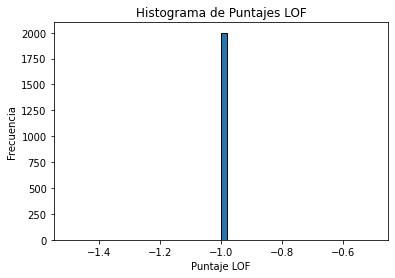

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor

# Cargar los datos normalizados
data_normalized = data[variables_to_normalize]

# Realizar PCA con 6 componentes
n_components = 6
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_normalized)

# Calcular los puntajes LOF
lof = LocalOutlierFactor(n_neighbors=5, metric='euclidean')
lof_scores = -lof.fit_predict(data_pca)  # Tomar el negativo para obtener valores positivos

# Crear un histograma de los puntajes LOF
print(data_normalized)
plt.hist(lof_scores, bins=50, edgecolor='black')
plt.xlabel('Puntaje LOF')
plt.ylabel('Frecuencia')
plt.title('Histograma de Puntajes LOF')
plt.show()


### 3.2 Identificar datos atípicos (5 puntos)

En base al histograma del punto 3.1, y considerando un umbral de corte igual a -1,15, determine los datos atípicos del dataset. ¿Qué proporción de datos corresponden a outliers?

Luego, elimine los datos atípicos del conjunto de datos evaluado.

RESPUESTA:

In [10]:
# Umbral de corte
threshold = -1.15

# Identificar índices de datos atípicos
outlier_indices = np.where(lof_scores < threshold)[0]

# Calcular la proporción de datos atípicos
proportion_outliers = len(outlier_indices) / len(data_normalized)

print(f'Proporción de Datos Atípicos: {proportion_outliers:.4f}')

# Eliminar datos atípicos del conjunto de datos
data_without_outliers = np.delete(data_normalized, outlier_indices, axis=0)


Proporción de Datos Atípicos: 0.0000


## Parte 4: Clasificación (15 puntos)

En esta última sección debe entrenar un clasificador basado en k-nearest neighbors. Para ello, debe considerar el resultado del punto 3.2. Es decir, el conjunto de datos que no contiene datos atípicos.

### 4.1 Separar train y test (4 puntos)

Tomando en consideración el resultado del punto 3.2, separe el conjunto de datos en train (75%) y test (25%). Utilice **price_range** como variable de respuesta (y).

Luego, para y_train e y_test, determine la cantidad de elementos de cada clase.

**Observación:**

Para trabajar con la variable **price_range**, debe eliminar los registros clasificados como atípicos en el dataset original de Mobile Price. Considere que la dimensión del vector **price_range** debe coincidir con el número de filas del conjunto de datos del punto 3.2.

RESPUESTA:

### 4.2 Aplicar clasificador KNeighborsClassifier (7 puntos)

Determine el número de vecinos entre los siguientes valores: 2, 3, 4, 5, 6 y 7. Considere la métrica score para tomar la decisión.

RESPUESTA:

### 4.3 Evaluar clasificador por clase (4 puntos)

Utilizando el mejor clasificador, identificado en el punto 4.2, evalúe el rendimiento por clase.

RESPUESTA: